In [1]:
import numpy as np
import math
import csv

In [2]:
n=1000
R=np.random.rand(n)
lamb=1.
alpha=1.
mu=0.
z=(np.power(((-lamb)*np.log(1-R)),(1/alpha)))+mu
np.set_printoptions(suppress=True)

In [3]:
z

array([2.26956298, 1.22617077, 0.9810903 , 0.36294816, 0.33840565,
       0.21413309, 1.21513161, 0.93418274, 0.20495452, 1.32478681,
       1.82897971, 0.6836898 , 1.8255077 , 1.26397634, 0.31705668,
       0.00500748, 0.87755218, 2.16292628, 0.69954542, 0.34129151,
       0.38705685, 0.0208671 , 0.14979366, 2.71894545, 3.20533283,
       0.55023672, 0.08986918, 0.95785266, 0.56933142, 4.38700458,
       0.23820697, 2.42362169, 0.00557487, 0.68718702, 2.32309366,
       3.39464493, 3.31580903, 0.47224541, 0.4359178 , 0.74494594,
       0.06476157, 1.1973844 , 1.83791855, 1.38561322, 0.59162644,
       1.10163097, 0.74239922, 0.96651766, 0.57886684, 2.31586536,
       0.58882823, 1.94361109, 0.75547704, 0.50002496, 2.37523691,
       0.15361128, 0.1016709 , 1.13333938, 0.17912649, 0.23152919,
       1.49088276, 1.36449278, 0.94476977, 0.35086977, 0.69032283,
       2.450354  , 0.16234846, 0.17372795, 0.55469868, 1.17254536,
       1.19139391, 0.37310003, 0.59165101, 0.17104819, 0.67784

In [4]:
z1=[]
for i in z:
    z1.append(str(i))

In [5]:
with open('weibdata.csv', 'a') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerow(z1)

csvFile.close()

In [1]:
import scipy.integrate as integrate
import numpy as np
from math import gamma
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt#NOTE - less range and accuracy in using numpy

In [69]:
K_=lambda alpha : np.power(alpha,(C+N-1))*np.exp(-D*alpha)*np.prod(np.power(R,(alpha-1)))*(1/np.power(B+np.sum(np.power(R,alpha)),(A+N)))

In [70]:
I1_=lambda alpha : np.power(alpha,(C+N))*np.exp(-D*alpha)*np.prod(np.power(R,(alpha-1)))*(1/np.power(B+np.sum(np.power(R,alpha)),(A+N)))

In [71]:
I2_=lambda alpha : np.power(alpha,(C+N+1))*np.exp(-D*alpha)*np.prod(np.power(R,(alpha-1)))*(1/np.power(B+np.sum(np.power(R,alpha)),(A+N)))

In [87]:
C=50
D=50
N=40
A=50
B=50

R=np.random.uniform(0,1,N)
ALPHA=1.
LAMBDA=1.
R=np.power(((-1/LAMBDA)*np.log(1-R)),1/ALPHA)

In [88]:
T=I1_(ALPHA)
K=lambda x: K_(x)*(1/T)
I1=lambda x: I1_(x)*(1/T)
I2=lambda x: I2_(x)*(1/T)

In [89]:
k=integrate.quad(K, 0, 6)[0]
i1=integrate.quad(I1, 0, 6)[0]
i2=integrate.quad(I2, 0, 6)[0]
print(k, i1, i2)

0.2552929046419434 0.2652193175859318 0.2779078460422917


In [90]:
p=-1
q=-1
i=0
while p<0 or q<0:
    R=np.random.uniform(0,1,N)
    R=np.power(((-1/LAMBDA)*np.log(1-R)),1/ALPHA)
    k=integrate.quad(K, 0, 6)[0]
    i1=integrate.quad(I1, 0, 6)[0]
    i2=integrate.quad(I2, 0, 6)[0]
    p=(i1*i1)/((k*i2)-(i1*i1))
    q=(p*k)/i1
    if i>100:
        break
    i+=1
print(i)

1


3553.3158234515804 4306.6373210088195 5269.648159514691
104.43249561734282 86.16505442643522


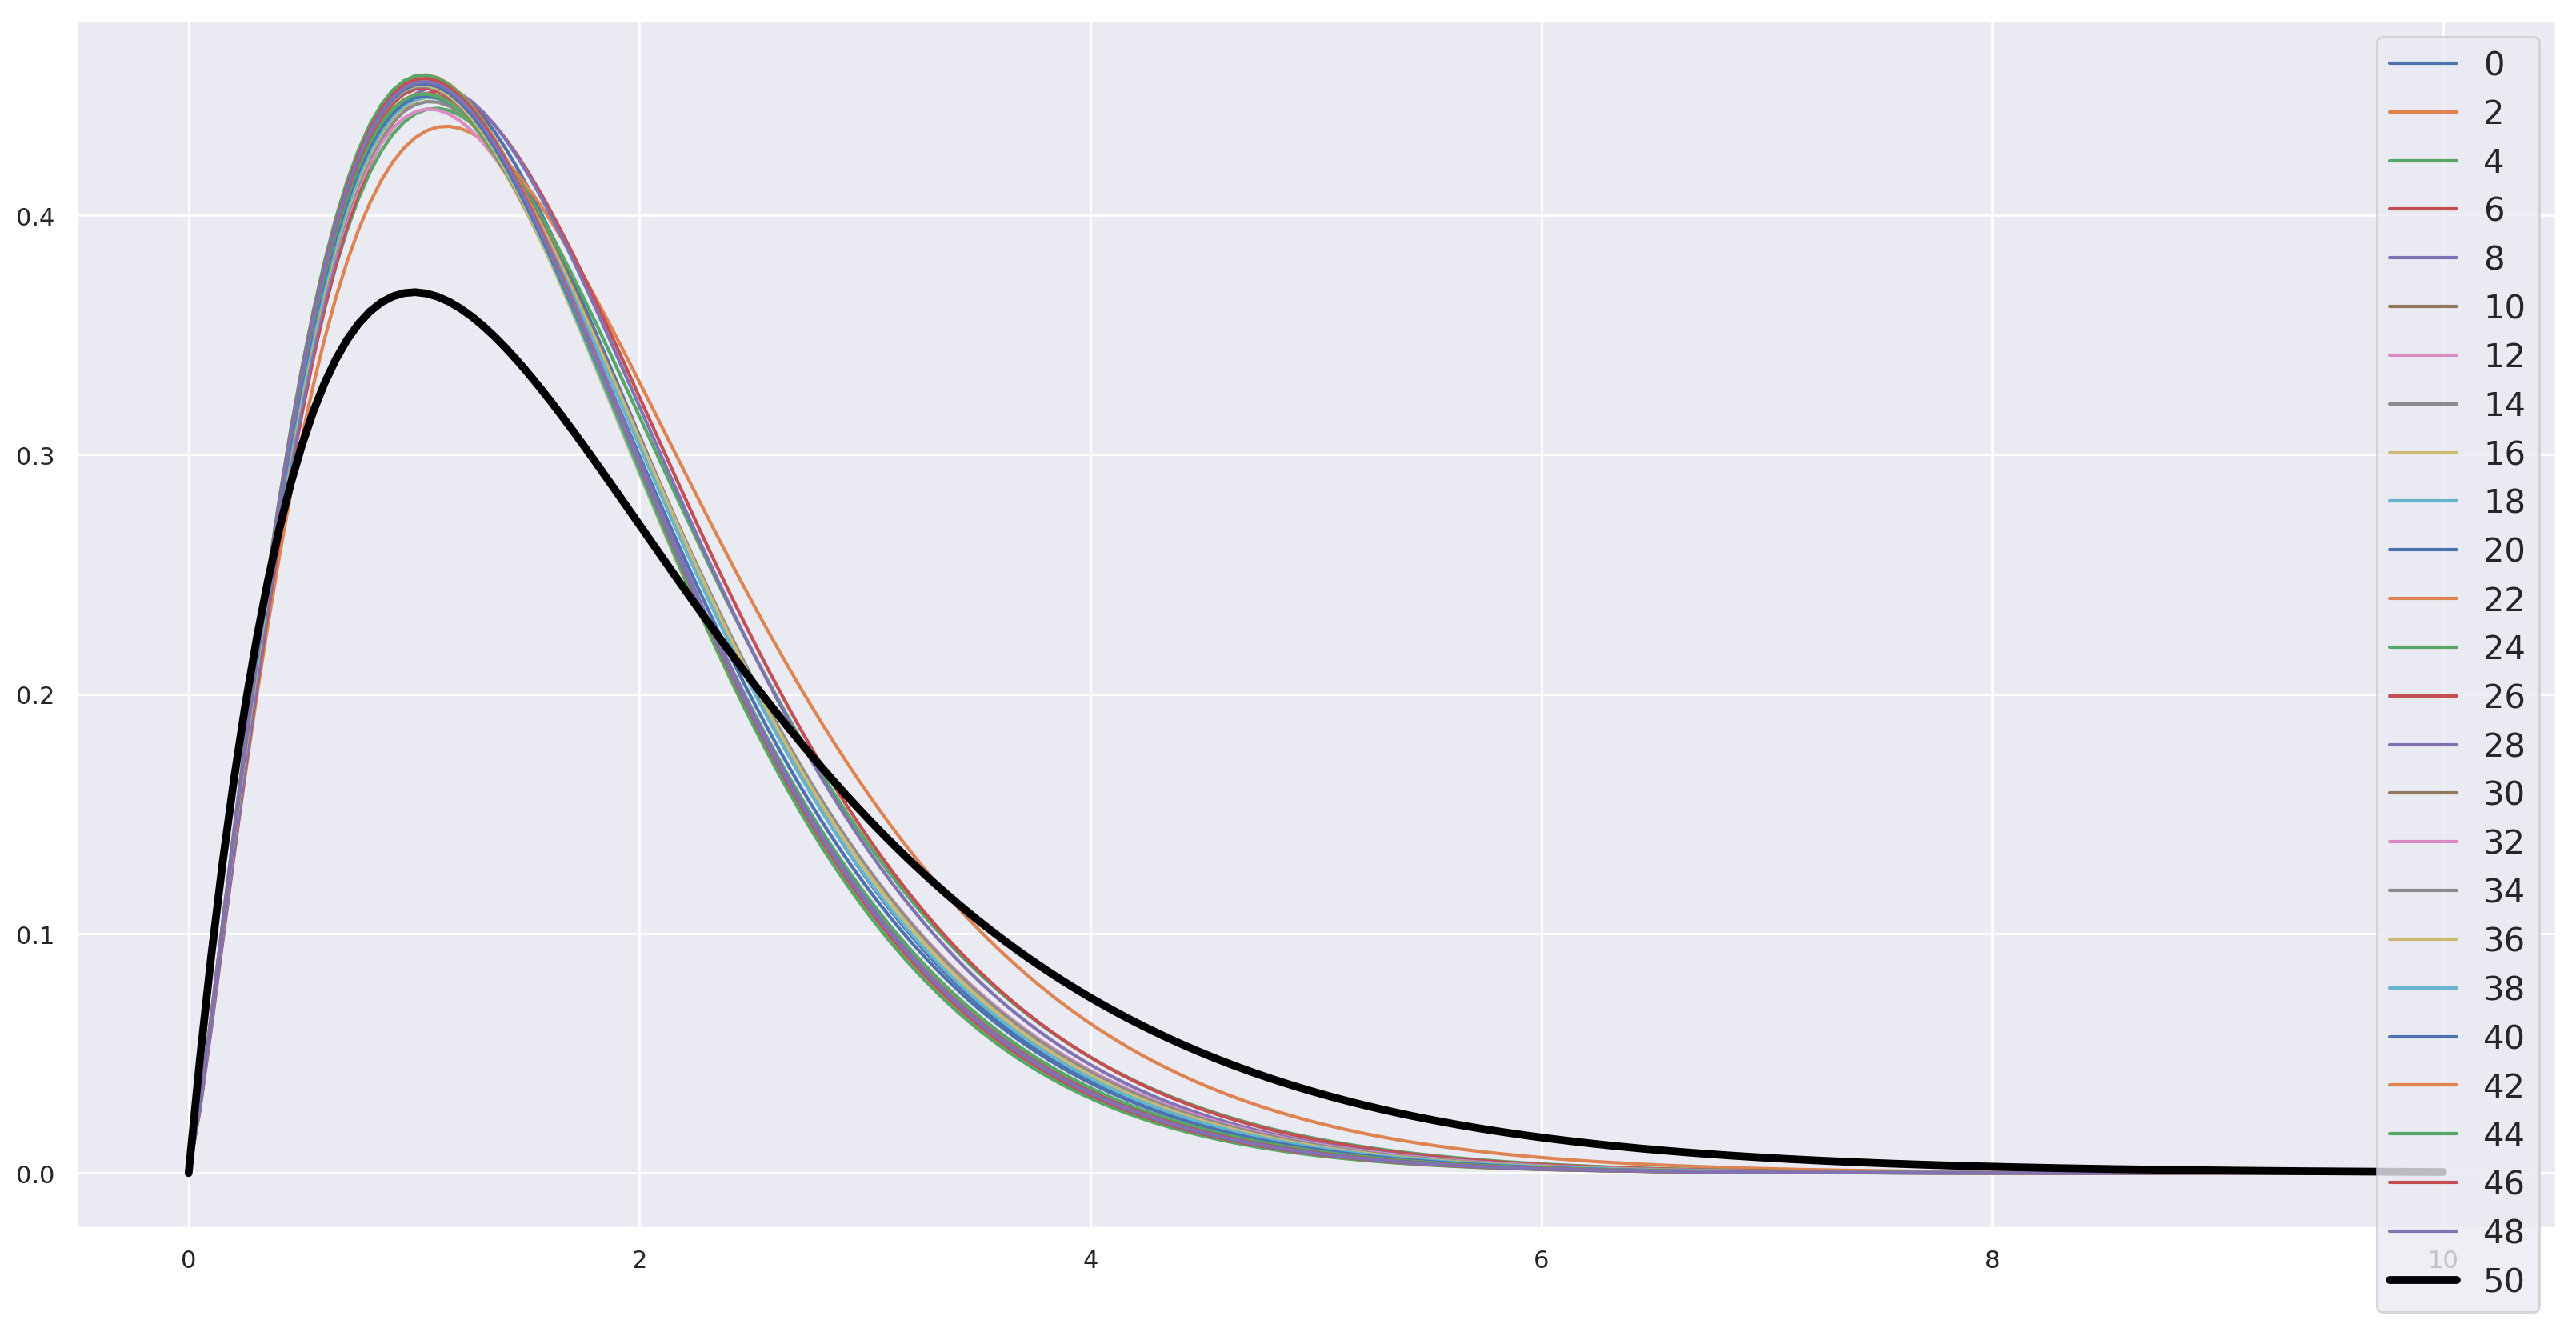

In [96]:
print(k, i1, i2)         ##NOT NORMALIZED YET
print(p,q)
val1=[]
val2=[]
mean_alp=0
mean_lam=0
plt.figure(figsize=(20,10), dpi=200)
pal = sns.dark_palette("palegreen", as_cmap=True)
#sns.set(style="whitegrid")
l=50
for i in range(l):
    val1.append(np.random.gamma(p,1/q))
    val2.append(np.random.gamma(A+N, 1/(B+np.sum(np.power(R,val1[i])))))
    mean_alp=(mean_alp*i + val1[i])/(i+1)
    mean_lam=(mean_lam*i + val2[i])/(i+1)
    if i%2==0:
        Val1=np.array(val1)
        Val2=np.array(val2)
        x1 = np.linspace (0, 10, 200) 
        y1 = mean_alp*mean_lam*np.power(x1,mean_alp)*np.exp(-mean_lam*np.power(x1,mean_alp))
        #y1 = np.mean(Val1)*np.mean(Val2)*np.power(x1,np.mean(Val1))*np.exp(-np.mean(Val2)*np.power(x1,np.mean(Val1)))
        #plt.figure()
        #sns.scatterplot(x1,y1, label=i, linewidth=2.5, cmap=pal)
        plt.plot(x1,y1, label=i)
        
val1=np.array(val1)
val2=np.array(val2)
y1 = ALPHA*LAMBDA*np.power(x1,ALPHA)*np.exp(-LAMBDA*np.power(x1,ALPHA))
plt.plot(x1,y1,label=l, color="black",linewidth=3.5)
plt.legend(prop={'size': 15})

In [97]:
va=np.sort(val1)
vl=np.sort(val2)
percentage=95
beta=(1-percentage/100)/2
(la,ua)=va[int(beta*l)], va[int((1-beta)*l)]
(ll,ul)=vl[int(beta*l)], vl[int((1-beta)*l)]
print(la, ua, ll, ul, beta)

1.1008696697420373 1.4967739869648689 0.7260948152147368 1.168272293315725 0.025000000000000022


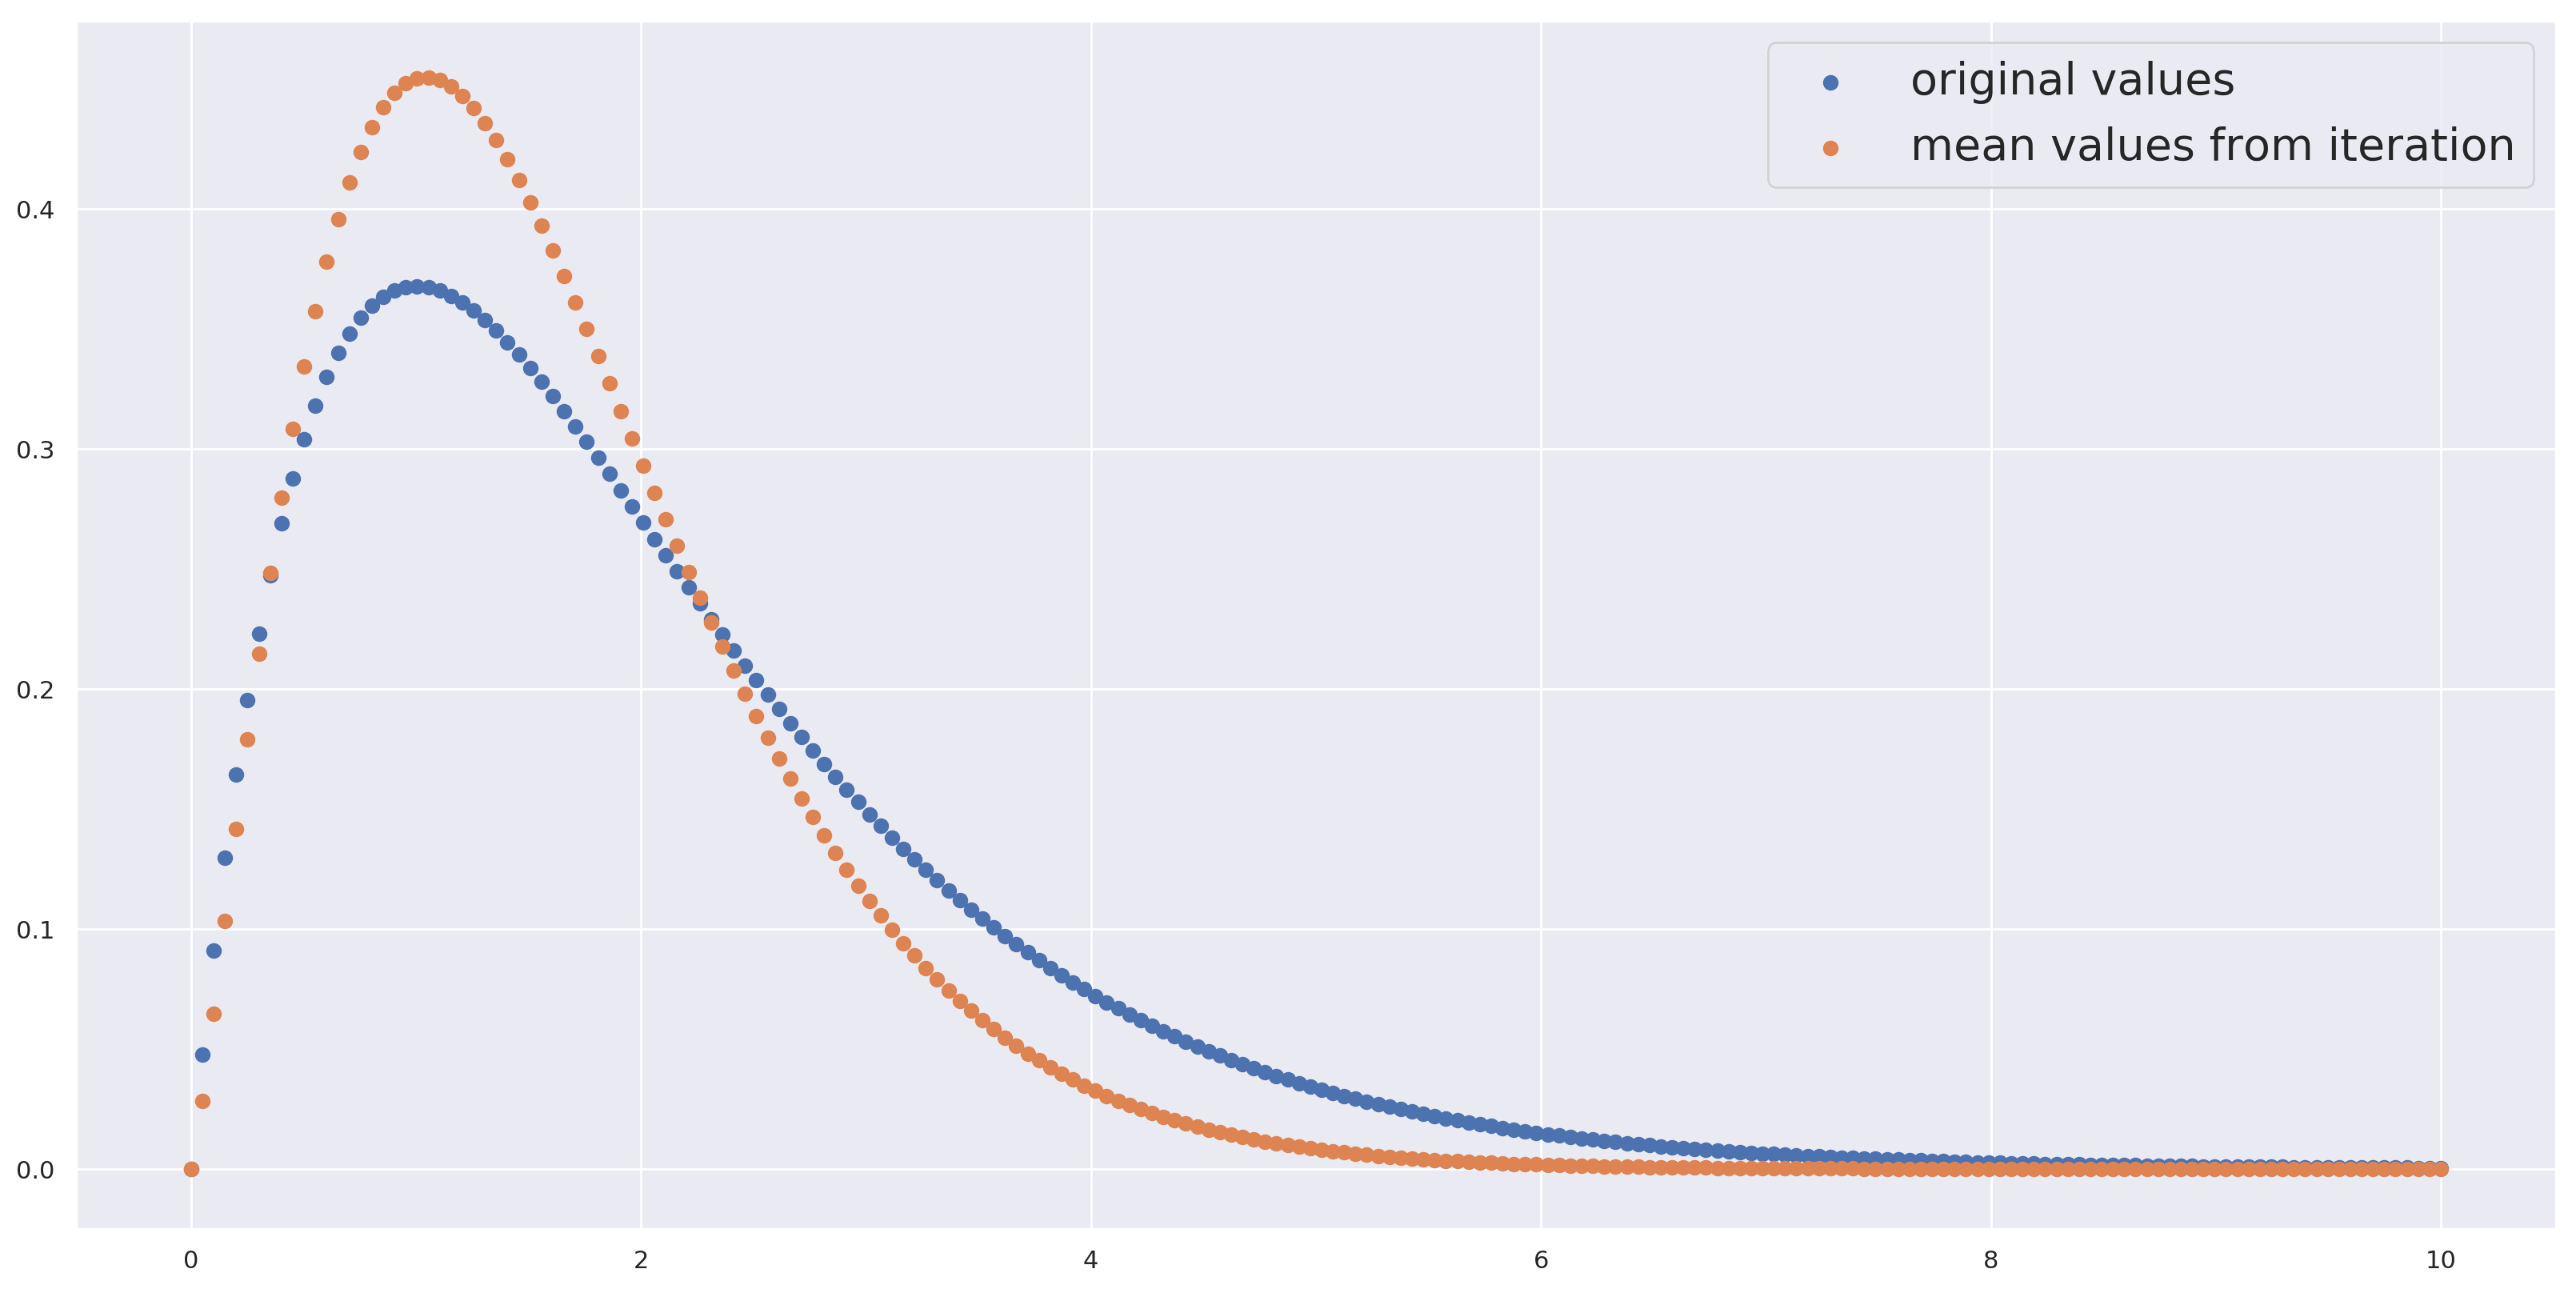

In [98]:
plt.figure(figsize=(20,10), dpi=200)
x1 = np.linspace (0, 10, 200) 
y1 = ALPHA*LAMBDA*np.power(x1,ALPHA)*np.exp(-LAMBDA*np.power(x1,ALPHA))
plt.scatter(x1,y1, label='original values')
# y2 = val1[-1]*val2[-1]*np.power(x1,val1[-1])*np.exp(-val2[-1]*np.power(x1,val1[-1]))
# plt.scatter(x1,y2, label='final values from iteration')
y3 = np.mean(val1)*np.mean(val2)*np.power(x1,np.mean(val1))*np.exp(-np.mean(val2)*np.power(x1,np.mean(val1)))
plt.scatter(x1,y3, label='mean values from iteration')
plt.legend(prop={'size': 20})

In [99]:
print('alpha for N = {}, priors - lambda~Gamma({}, {}), alpha~Gamma({}, {})'.format(N,A,B,C,D))
print('mean is {}'.format(np.mean(val1)))
print('MSE is {}'.format((1/l)*np.sum(np.square(val1-ALPHA))))

alpha for N = 40, priors - lambda~Gamma(50, 50), alpha~Gamma(50, 50)
mean is 1.2366326676154111
MSE is 0.06718879518595461


In [100]:
print('lambda for N = {}, priors - lambda~Gamma({}, {}), alpha~Gamma({}, {})'.format(N,A,B,C,D))
print('mean is {}'.format(np.mean(val2)))
print('MSE is {}'.format((1/l)*np.sum(np.square(val2-LAMBDA))))

lambda for N = 40, priors - lambda~Gamma(50, 50), alpha~Gamma(50, 50)
mean is 0.949456180950884
MSE is 0.015456502209834787


In [160]:
GAM = lambda x: np.power(q,p)*np.power(x,p-1)*np.exp(-x*q)*(1/gamma(p))

In [161]:
data=np.random.uniform(0,16,16000)
otp=np.array([K(a)/k for a in data])

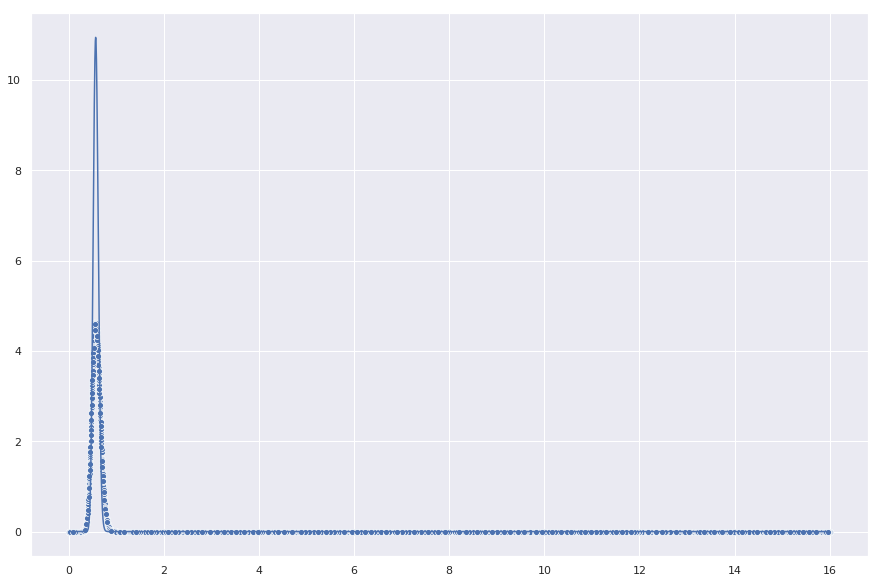

In [162]:
plt.figure(figsize = (15,10))
# plt.scatter(data,GAM(data), marker="s")
# plt.scatter(data, otp, marker='o')
#plt.hist(otp, bins='auto')
#plt.hist(GAM(data), histtype='stepfilled', bins=30, alpha=0.8, density=True)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#cmap=sns.color_palette("cubehelix", 8, as_cmap=True)
#plt.scatter(data, GAM(data), color='black')
#plt.scatter(data,otp)
sns.scatterplot(data,GAM(data), cmap=cmap)
sns.lineplot(data,otp )

In [172]:
k=integrate.quad(K_, 0, 6)[0]
i1=integrate.quad(I1_, 0, 6)[0]
i2=integrate.quad(I2_, 0, 6)[0]
print(k, i1, i2)

2.981832471539795e-67 3.1529383214432776e-67 3.3810534974960594e-67


In [173]:
p=-1
q=-1
i=0
while p<0 or q<0:
    R=np.random.uniform(0,1,N)
    R=np.power(((-1/LAMBDA)*np.log(1-R)),1/ALPHA)
    k=integrate.quad(K_, 0, 6)[0]
    i1=integrate.quad(I1_, 0, 6)[0]
    i2=integrate.quad(I2_, 0, 6)[0]
    p=(i1*i1)/((k*i2)-(i1*i1))
    q=(p*k)/i1
    if i>100:
        break
    i+=1
print(i)

1


296274257331603.0 150457791214607.38 77101405279877.94
110.09695461683341 216.79763606955487


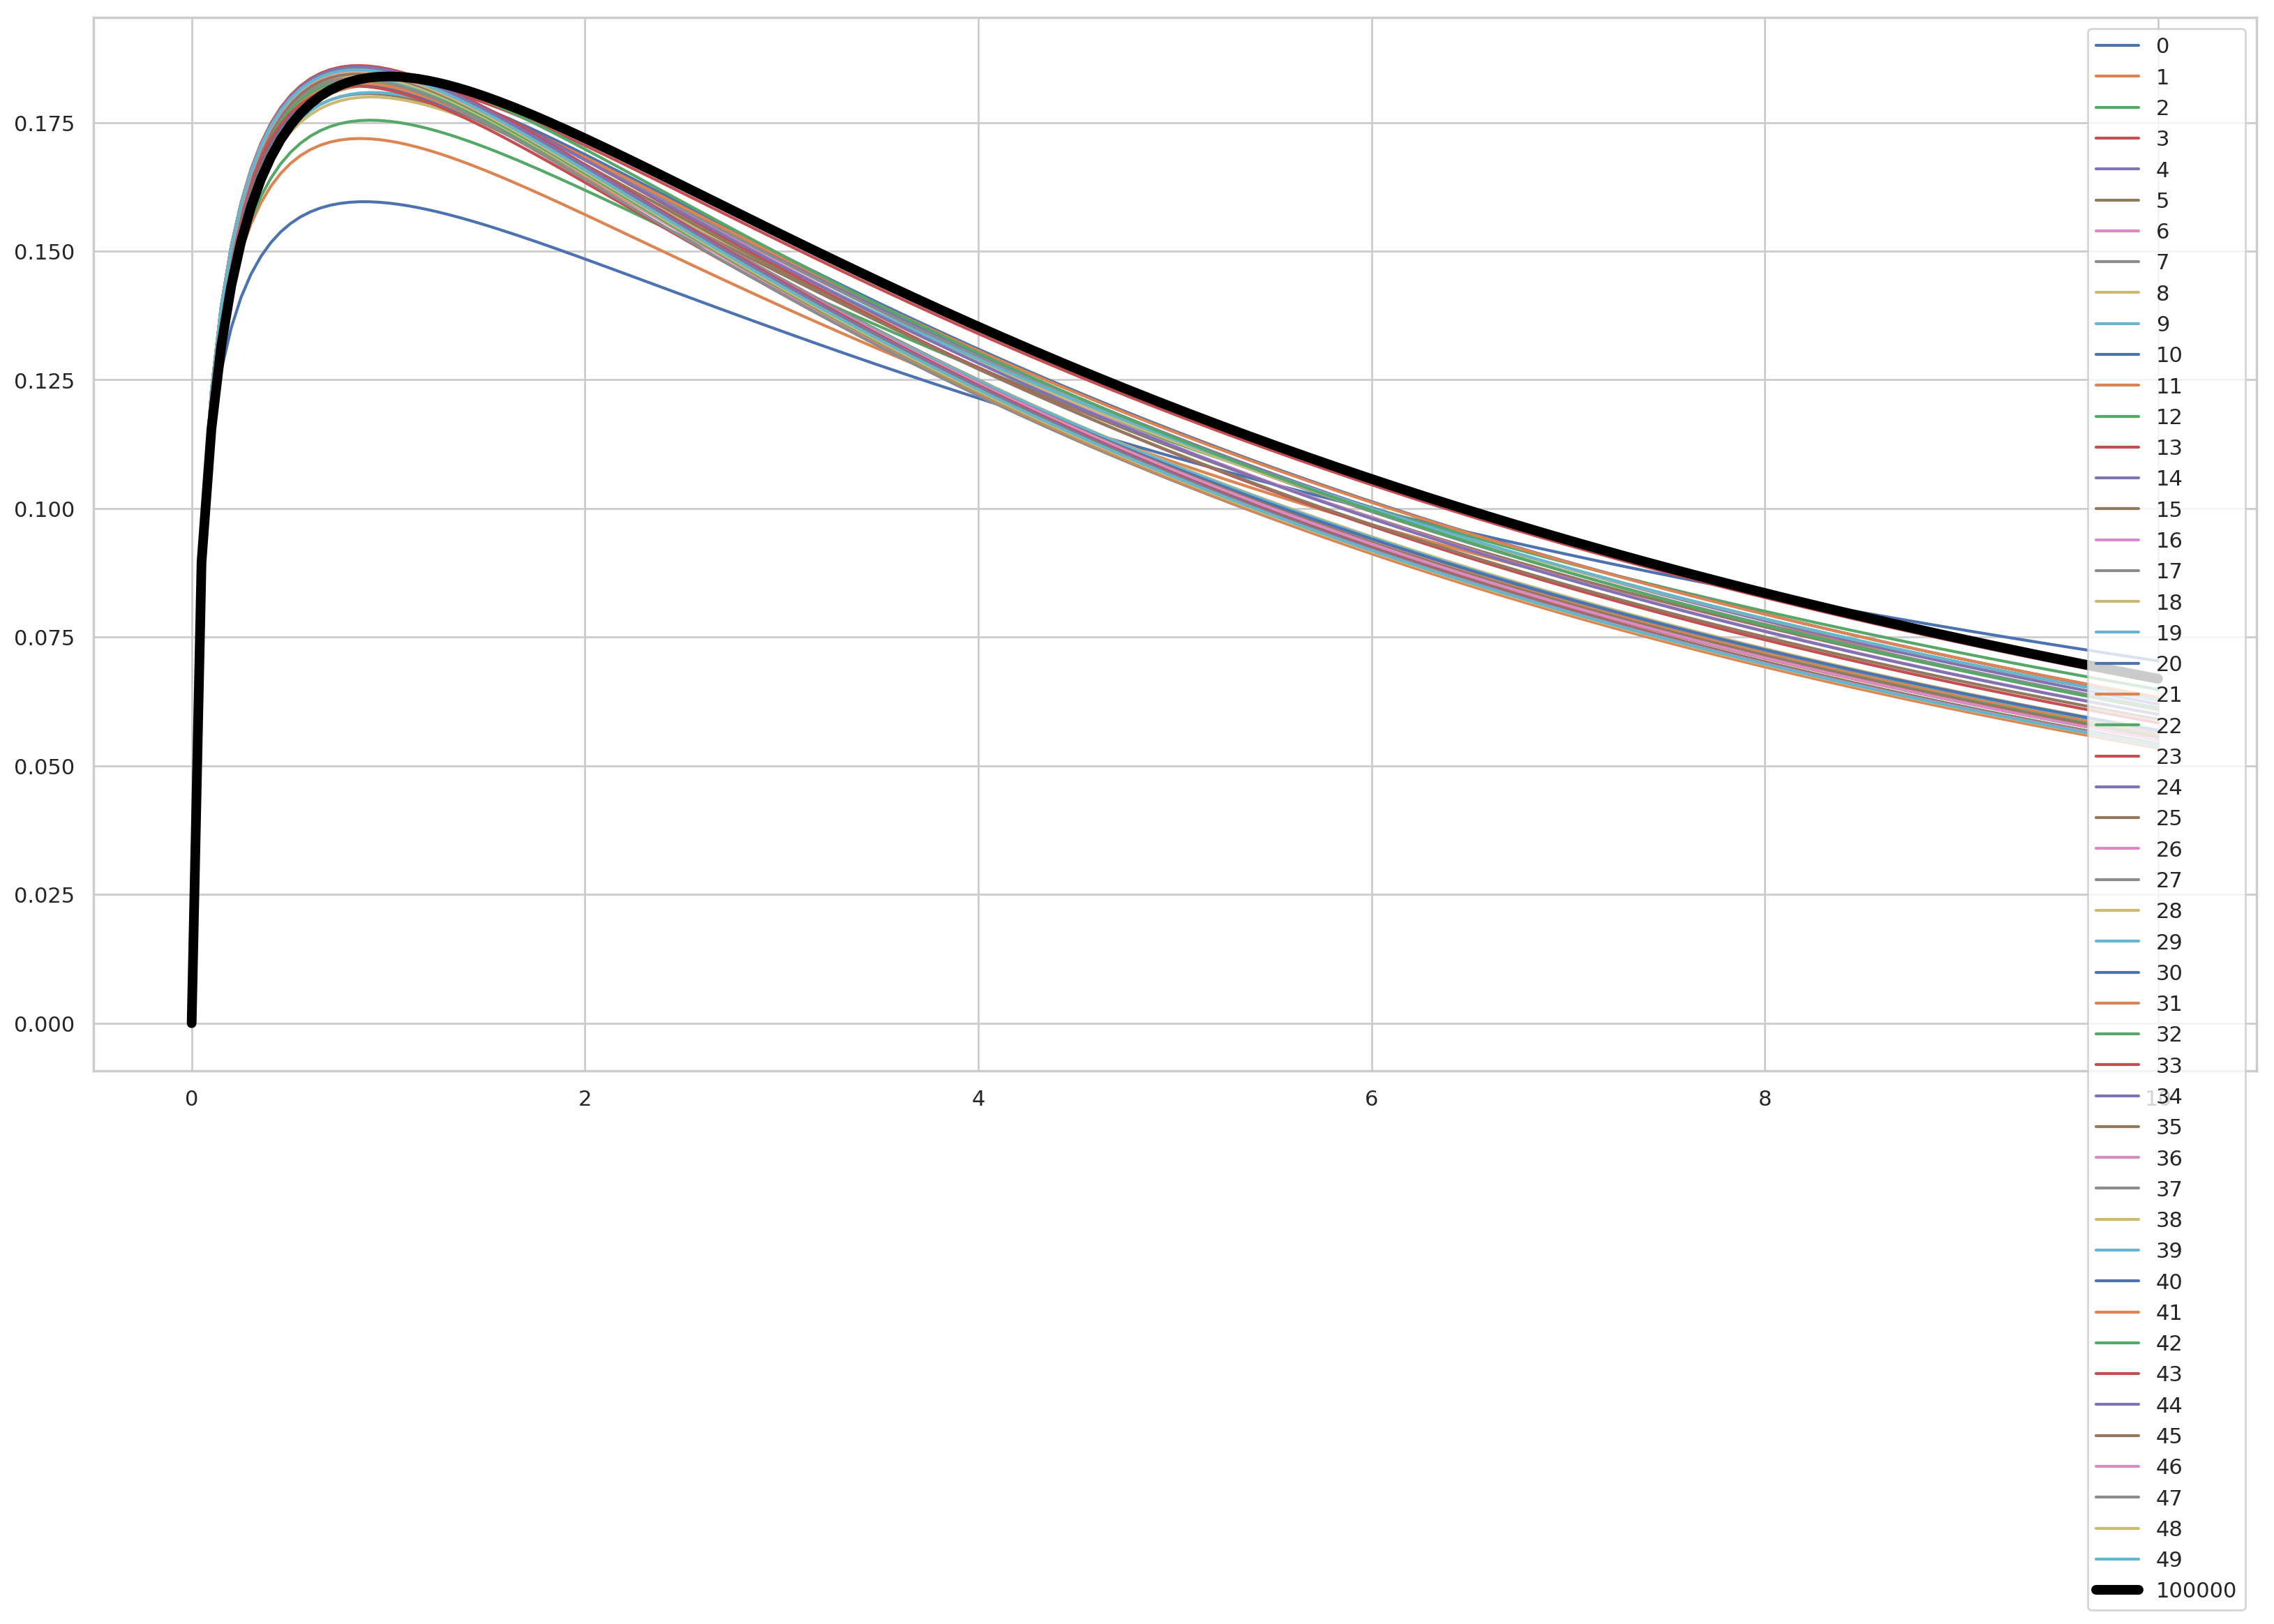

In [406]:
print(k, i1, i2)         ##NOT NORMALIZED YET
print(p,q)
val1=[]
val2=[]
plt.figure(figsize=(20,10), dpi=200)
mean_alp=0
mean_lam=0
l=50
for i in range(l):
    val1.append(np.random.gamma(p,1/q))
    val2.append(np.random.gamma(A+N, 1/(B+np.sum(np.power(R,val1[i])))))
    mean_alp=(mean_alp*i + val1[i])/(i+1)
    mean_lam=(mean_lam*i + val2[i])/(i+1)
    if i%1==0:
        x1 = np.linspace (0, 10, 200) 
        y1 = mean_alp*mean_lam*np.power(x1,mean_alp)*np.exp(-mean_lam*np.power(x1,mean_alp))
        #plt.figure()
        plt.plot(x1,y1, label=i)
        
val1=np.array(val1)
val2=np.array(val2)
y1 = ALPHA*LAMBDA*np.power(x1,ALPHA)*np.exp(-LAMBDA*np.power(x1,ALPHA))
plt.plot(x1,y1, color='black',label=100000, linewidth=5)
plt.legend()

In [407]:
print('alpha for N = {}, priors - lambda~Gamma({}, {}), alpha~Gamma({}, {})'.format(N,A,B,C,D))
print('mean is {}'.format(np.mean(val1)))
print('MSE is {}'.format((1/l)*np.sum(np.square(val1-ALPHA))))

alpha for N = 40, priors - lambda~Gamma(50, 50), alpha~Gamma(50, 100)
mean is 0.5035610401946076
MSE is 0.0026180154541904747


In [408]:
print('lambda for N = {}, priors - lambda~Gamma({}, {}), alpha~Gamma({}, {})'.format(N,A,B,C,D))
print('mean is {}'.format(np.mean(val2)))
print('MSE is {}'.format((1/l)*np.sum(np.square(val2-LAMBDA))))

lambda for N = 40, priors - lambda~Gamma(50, 50), alpha~Gamma(50, 100)
mean is 1.0918810489635669
MSE is 0.021541595512483806


In [335]:
ALPHA=1.
LAMBDA=1.
N=40
R=np.random.uniform(0,1,N)
R=np.power(((-1/LAMBDA)*np.log(1-R)),1/ALPHA)
U1=2*ALPHA
U2=2*LAMBDA

In [336]:
K_u = lambda alpha: np.power(alpha,N)*np.prod(np.power(R,alpha-1))*(1/np.power(np.sum(np.power(R,alpha)), 1+N))*(1/(U1*U2))

In [337]:
I1_u = lambda alpha: np.power(alpha,N+1)*np.prod(np.power(R,alpha-1))*(1/np.power(np.sum(np.power(R,alpha)), 1+N))*(1/(U1*U2))

In [338]:
I2_u = lambda alpha: np.power(alpha,N+2)*np.prod(np.power(R,alpha-1))*(1/np.power(np.sum(np.power(R,alpha)), 1+N))*(1/(U1*U2))

In [339]:
k_u=integrate.quad(K_u, 0, 5)[0]
i1_u=integrate.quad(I1_u, 0, 5)[0]
i2_u=integrate.quad(I2_u, 0, 5)[0]
print(k_u, i1_u, i2_u)
p_u=(i1_u*i1_u)/((k_u*i2_u)-(i1_u*i1_u))
q_u=(p_u*k_u)/i1_u
print(p_u, q_u)

9.33082358025409e-65 9.317882261353661e-65 9.446614736717716e-65
65.68708029928592 65.77831105644164


9.33082358025409e-65 9.317882261353661e-65 9.446614736717716e-65
65.68708029928592 65.77831105644164


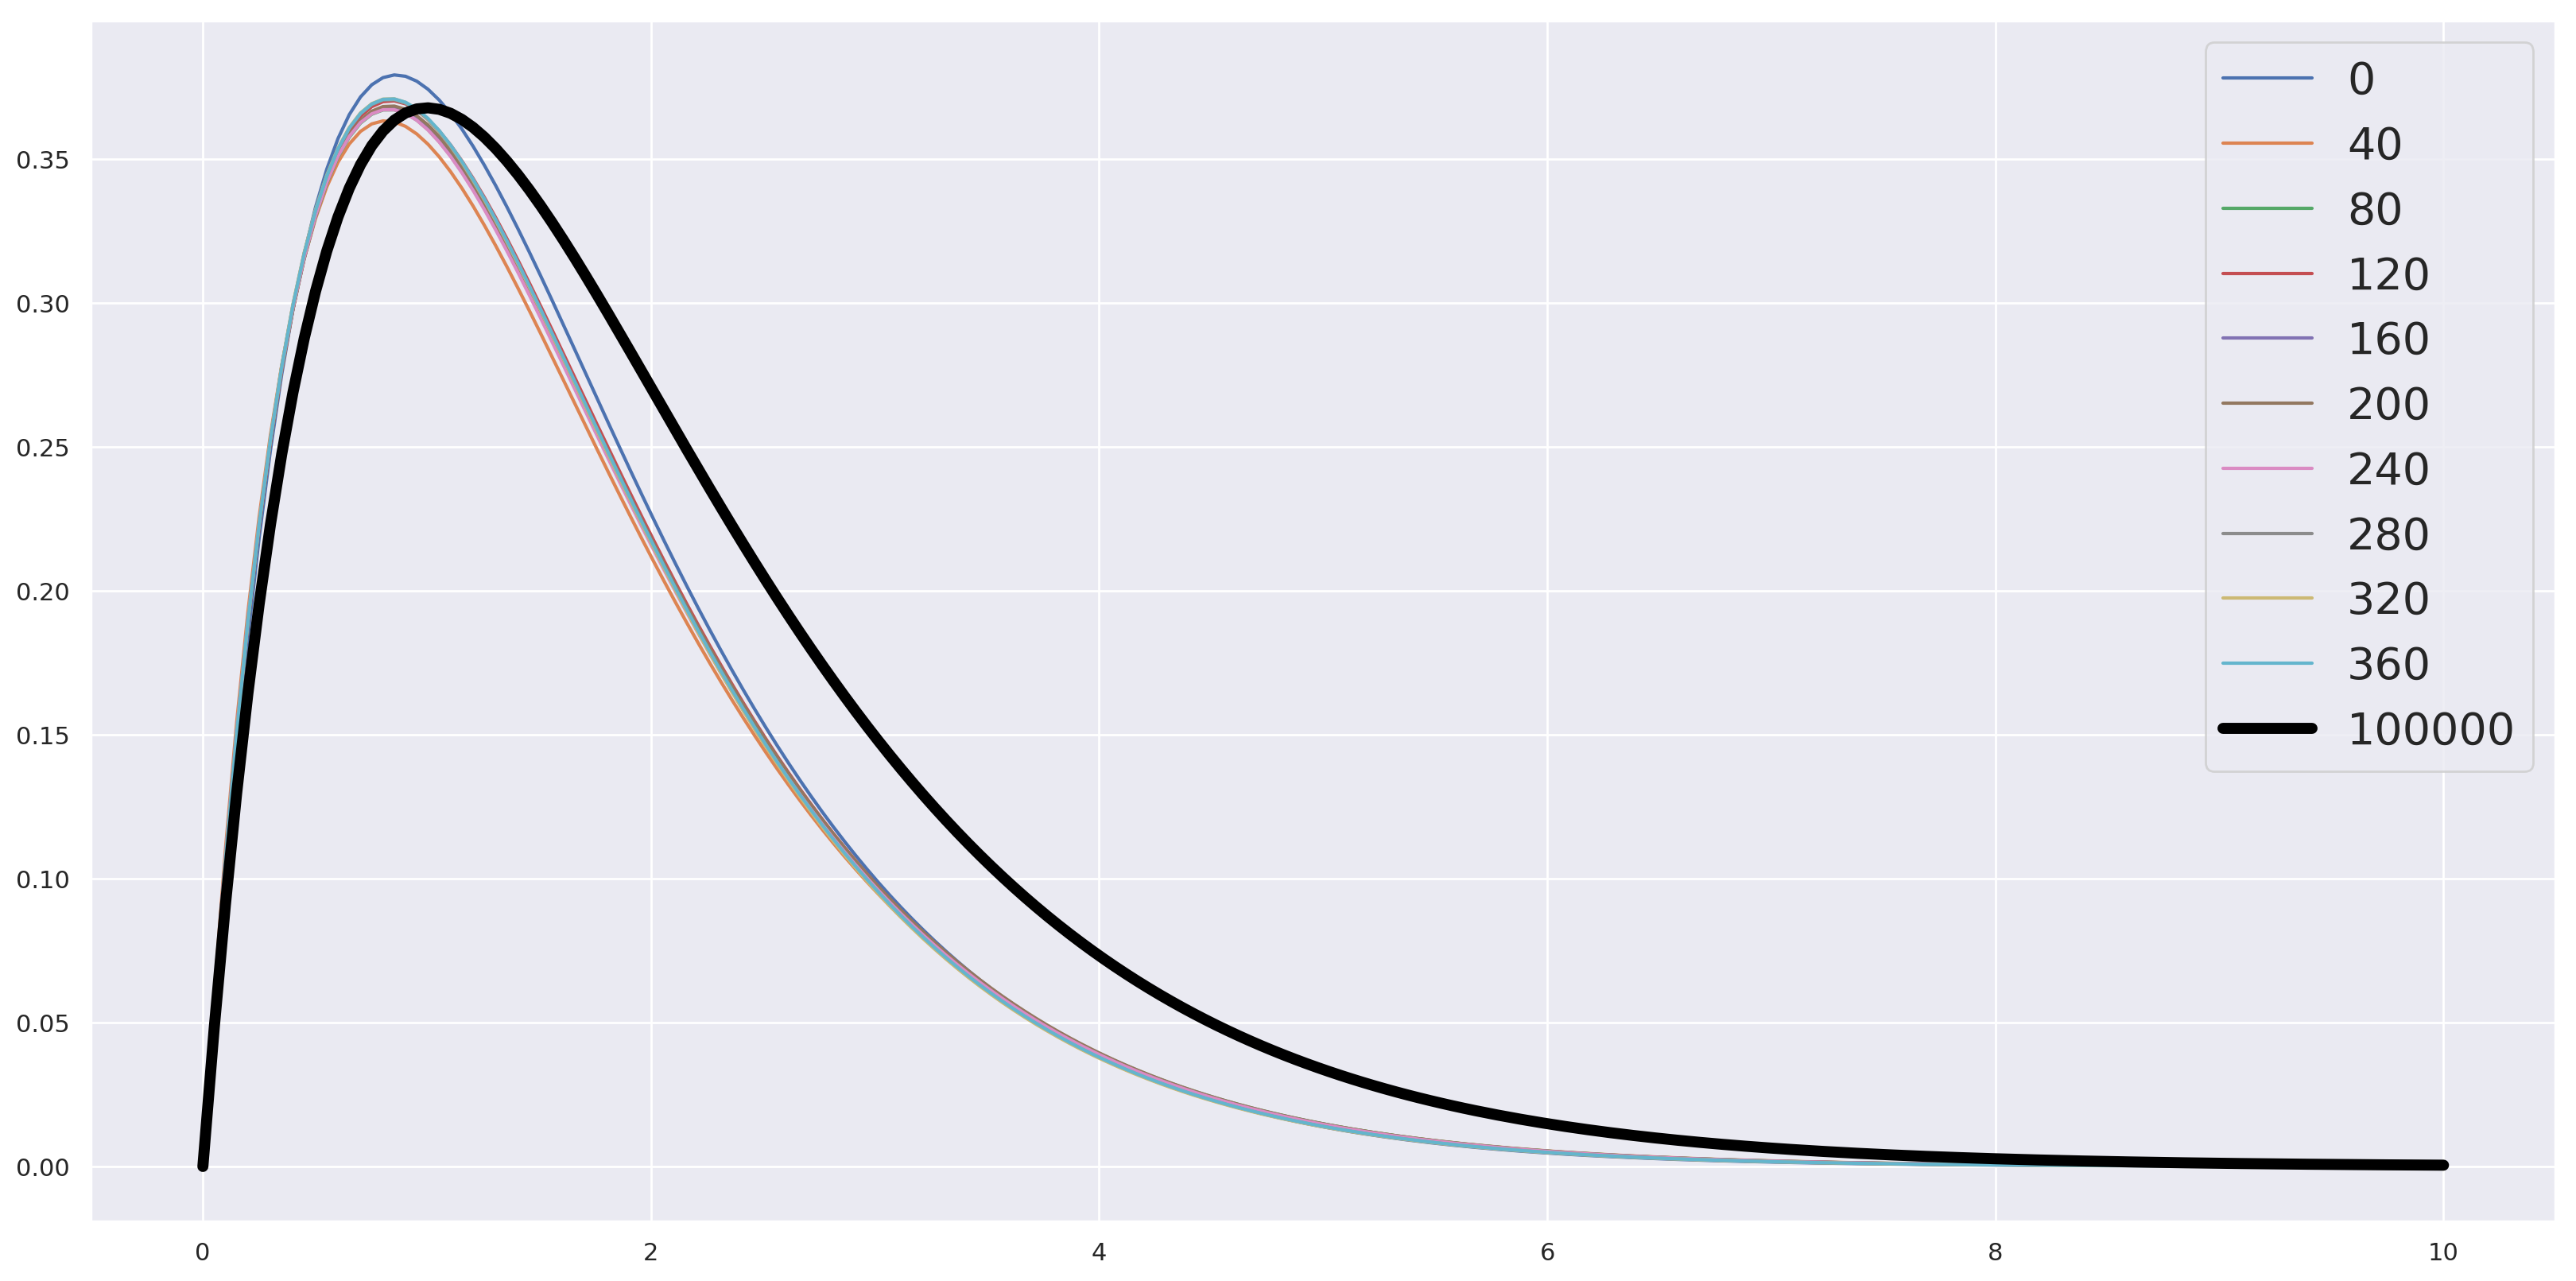

In [340]:
print(k_u, i1_u, i2_u)         ##NOT NORMALIZED YET
print(p_u,q_u)
val1_u=[]
val2_u=[]
plt.figure(figsize=(20,10), dpi=200)
mean_alp=0
mean_lam=0
l=400
for i in range(l):
    val1_u.append(np.random.gamma(p_u,1/q_u))
    val2_u.append(np.random.gamma(1+N, 1/(np.sum(np.power(R,val1_u[i])))))
    mean_alp=(mean_alp*i + val1_u[i])/(i+1)
    mean_lam=(mean_lam*i + val2_u[i])/(i+1)
    if i%40==0:
        x1 = np.linspace (0, 10, 200) 
        y1 = mean_alp*mean_lam*np.power(x1,mean_alp)*np.exp(-mean_lam*np.power(x1,mean_alp))
        #plt.figure()
        plt.plot(x1,y1, label=i)
val1_u=np.array(val1_u)
val2_u=np.array(val2_u)
y1 = ALPHA*LAMBDA*np.power(x1,ALPHA)*np.exp(-LAMBDA*np.power(x1,ALPHA))
plt.plot(x1,y1, color='black',label=100000, linewidth=5)
plt.legend(prop={'size': 20})

In [341]:
va=np.sort(val1_u)
vl=np.sort(val2_u)
percentage=95
beta=(1-percentage/100)/2
(la,ua)=va[int(beta*l)], va[int((1-beta)*l)]
(ll,ul)=vl[int(beta*l)], vl[int((1-beta)*l)]
print(la, ua, ll, ul, beta)

0.7795628342344206 1.2867176305747083 0.8457696884909994 1.5793941476253668 0.025000000000000022


In [226]:
print('alpha for N = {}, priors - alpha~U(0,{}), lambda~U(0,{})'.format(N, U1, U2))
print('mean is {}'.format(np.mean(val1_u)))
print('MSE is {}'.format((1/l)*np.sum(np.square(val1_u-ALPHA))))

alpha for N = 40, priors - alpha~U(0,2.0), lambda~U(0,2.0)
mean is 1.0968783547560028
MSE is 0.027780547462796866


In [227]:
print('lambda for N = {}, priors - alpha~U(0,{}), lambda~U(0,{})'.format(N, U1, U2))
print('mean is {}'.format(np.mean(val2_u)))
print('MSE is {}'.format((1/l)*np.sum(np.square(val2_u-LAMBDA))))

lambda for N = 40, priors - alpha~U(0,2.0), lambda~U(0,2.0)
mean is 1.2074745641569902
MSE is 0.08031846032466992


In [171]:
GAM_u = lambda x: np.power(q_u,p_u)*np.power(x,p_u-1)*np.exp(-x*q_u)*(1/gamma(p_u))

In [172]:
data=np.random.uniform(0,16,10000)
otp_u=np.array([K_u(a)/k_u for a in data])

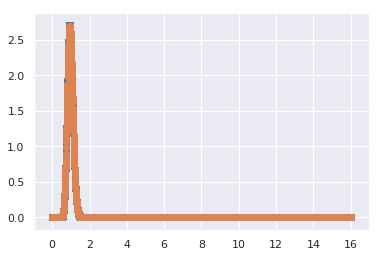

In [173]:
plt.scatter(data,GAM_u(data), marker="s")
plt.scatter(data, otp_u, marker='o')

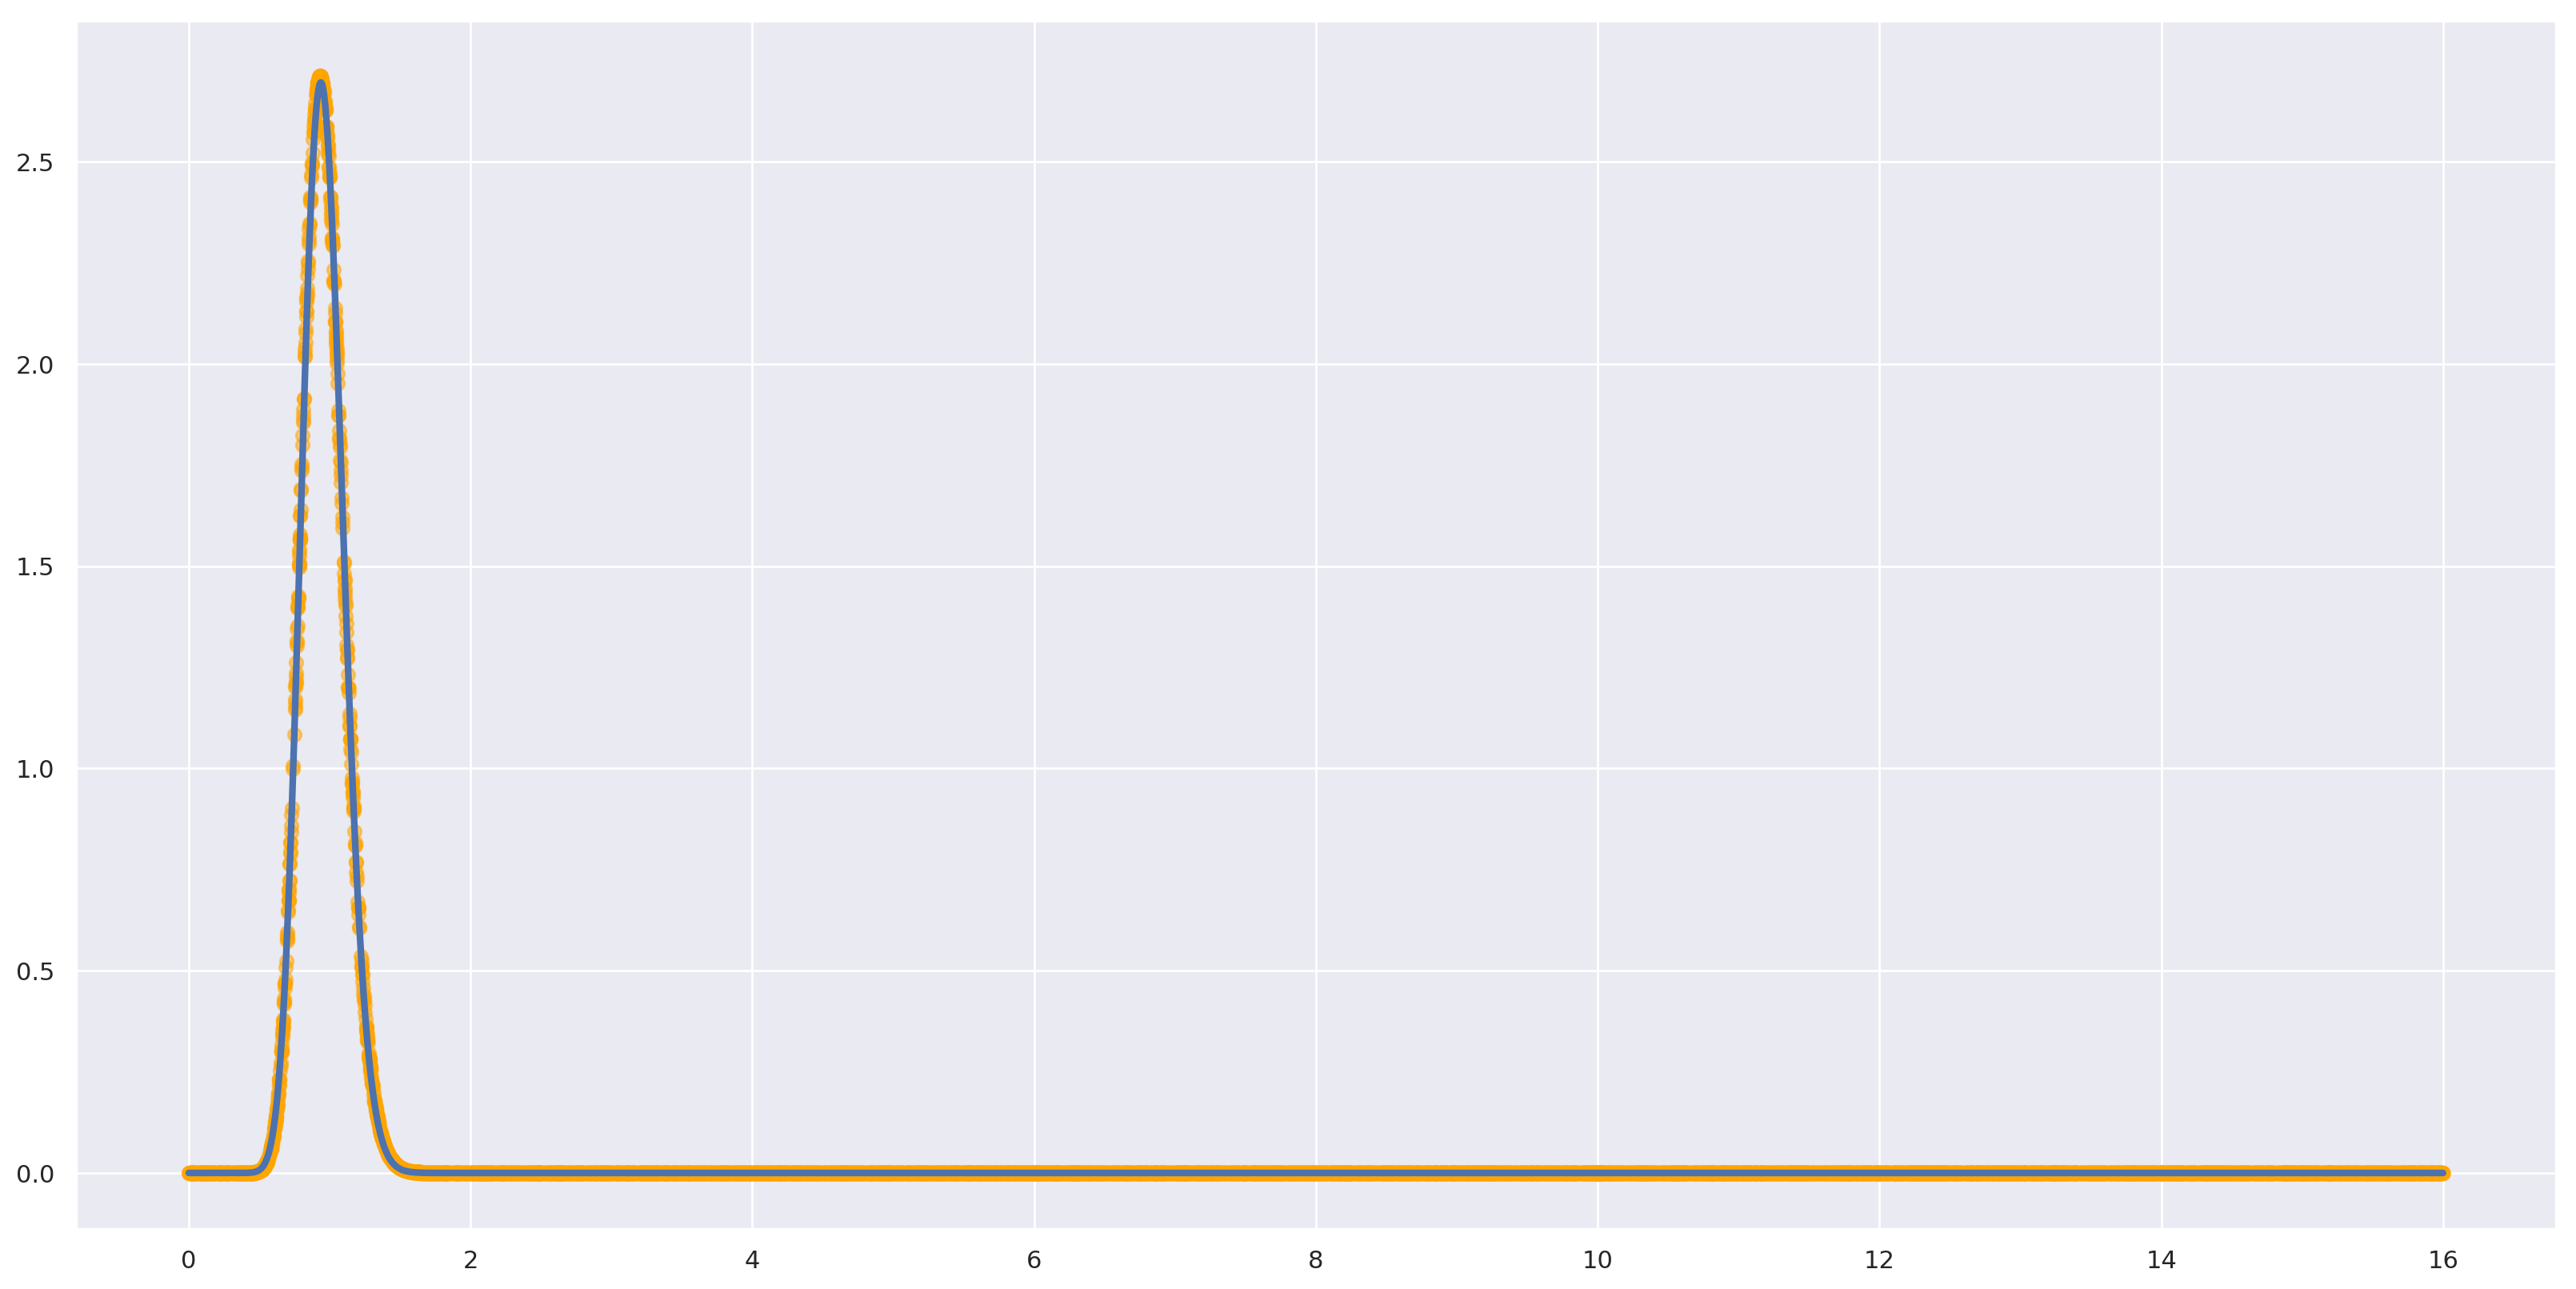

In [192]:
plt.figure(figsize=(20,10), dpi=200)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#cmap=sns.color_palette("cubehelix", 8, as_cmap=True)
plt.scatter(data, GAM_u(data), color='orange',alpha=0.5)
# #plt.scatter(data,otp)
# sns.scatterplot(data,GAM_u(data), cmap=cmap)
sns.lineplot(data,otp_u, palette=sns.xkcd_rgb["black"],lw=3 )

In [234]:
from scipy import linalg
R=np.random.uniform(0,1,N)
ALPHA=1.
LAMBDA=1.
R=np.power(((-1/LAMBDA)*np.log(1-R)),1/ALPHA)
alpha=0.9586332951581324
lamda=0.9696183174311593
J=(1/N)*np.array([[N/(alpha*alpha) + lamda*np.sum(np.power(R,alpha)*np.log(R)*np.log(R)), np.sum(np.power(R,alpha)*np.log(R))],
          [np.sum(np.power(R,alpha)*np.log(R)), N/(lamda*lamda)]])

In [239]:
I=linalg.inv(J)
(l_a, u_a)= alpha - 1.96/np.sqrt(I[0,0]), alpha + 1.96/np.sqrt(I[0,0])
(l_l, u_l)= lamda - 1.96/np.sqrt(I[1,1]), lamda + 1.96/np.sqrt(I[1,1])

In [5]:
K_=lambda alpha, mu : np.power(alpha,(C+N-1))*np.exp(-D*alpha)*np.prod(np.power(R-mu,(alpha-1)))*(1/np.amin(R))*(1/np.power(B+np.sum(np.power(R-mu,alpha)),(A+N)))

In [6]:
I1_=lambda alpha, mu : np.power(alpha,(C+N))*np.exp(-D*alpha)*np.prod(np.power(R-mu,(alpha-1)))*(1/np.amin(R))*(1/np.power(B+np.sum(np.power(R-mu,alpha)),(A+N)))

In [7]:
I2_=lambda alpha, mu : np.power(alpha,(C+N+1))*np.exp(-D*alpha)*np.prod(np.power(R-mu,(alpha-1)))*(1/np.amin(R))*(1/np.power(B+np.sum(np.power(R-mu,alpha)),(A+N)))

In [19]:
C=50
D=50
N=40
A=50
B=50

R=np.random.uniform(0,1,N)
ALPHA=1.
LAMBDA=1.
MU=0
R=np.power(((-1/LAMBDA)*np.log(1-R)),1/ALPHA)+MU

In [20]:
T=I1_(ALPHA, MU)
K=lambda x, y: K_(x,y)*(1/T)
I1=lambda x, y: I1_(x,y)*(1/T)
I2=lambda x, y: I2_(x,y)*(1/T)

In [21]:
k=integrate.quad(lambda alpha: K(alpha, MU), 0, 6)[0]
#k=integrate.nquad(K_, [[0, 6], [0, 6]])[0]
i1=integrate.quad(lambda alpha: I1(alpha, MU), 0, 6)[0]
i2=integrate.quad(lambda alpha: I2(alpha, MU), 0, 6)[0]
print(k, i1, i2)

0.2593941219460624 0.2712236649108461 0.2859331293831125


In [22]:
p=-1
q=-1
i=0
while p<0 or q<0:
    R=np.random.uniform(0,1,N)
    R=np.power(((-1/LAMBDA)*np.log(1-R)),1/ALPHA)+MU
    val3 = np.amin(R)-1/N                                    #mu estimated as Z(1) - 1/N
    k=integrate.quad(lambda alpha: K(alpha, val3), 0, 6)[0]
    i1=integrate.quad(lambda alpha: I1(alpha, val3), 0, 6)[0]
    i2=integrate.quad(lambda alpha: I2(alpha, val3), 0, 6)[0]
    p=(i1*i1)/((k*i2)-(i1*i1))
    q=(p*k)/i1
    if i>100:
        break
    i+=1
print(i)

1


In [23]:
print(np.amin(R))
print(np.random.uniform(0, np.amin(R)))
print(np.amin(R)-1/N)

0.009031490772544188
0.0010718347093676861
-0.015968509227455813


12.097076404505655 11.705740178177715 11.423920594538602
116.94619410079996 120.85583856464508


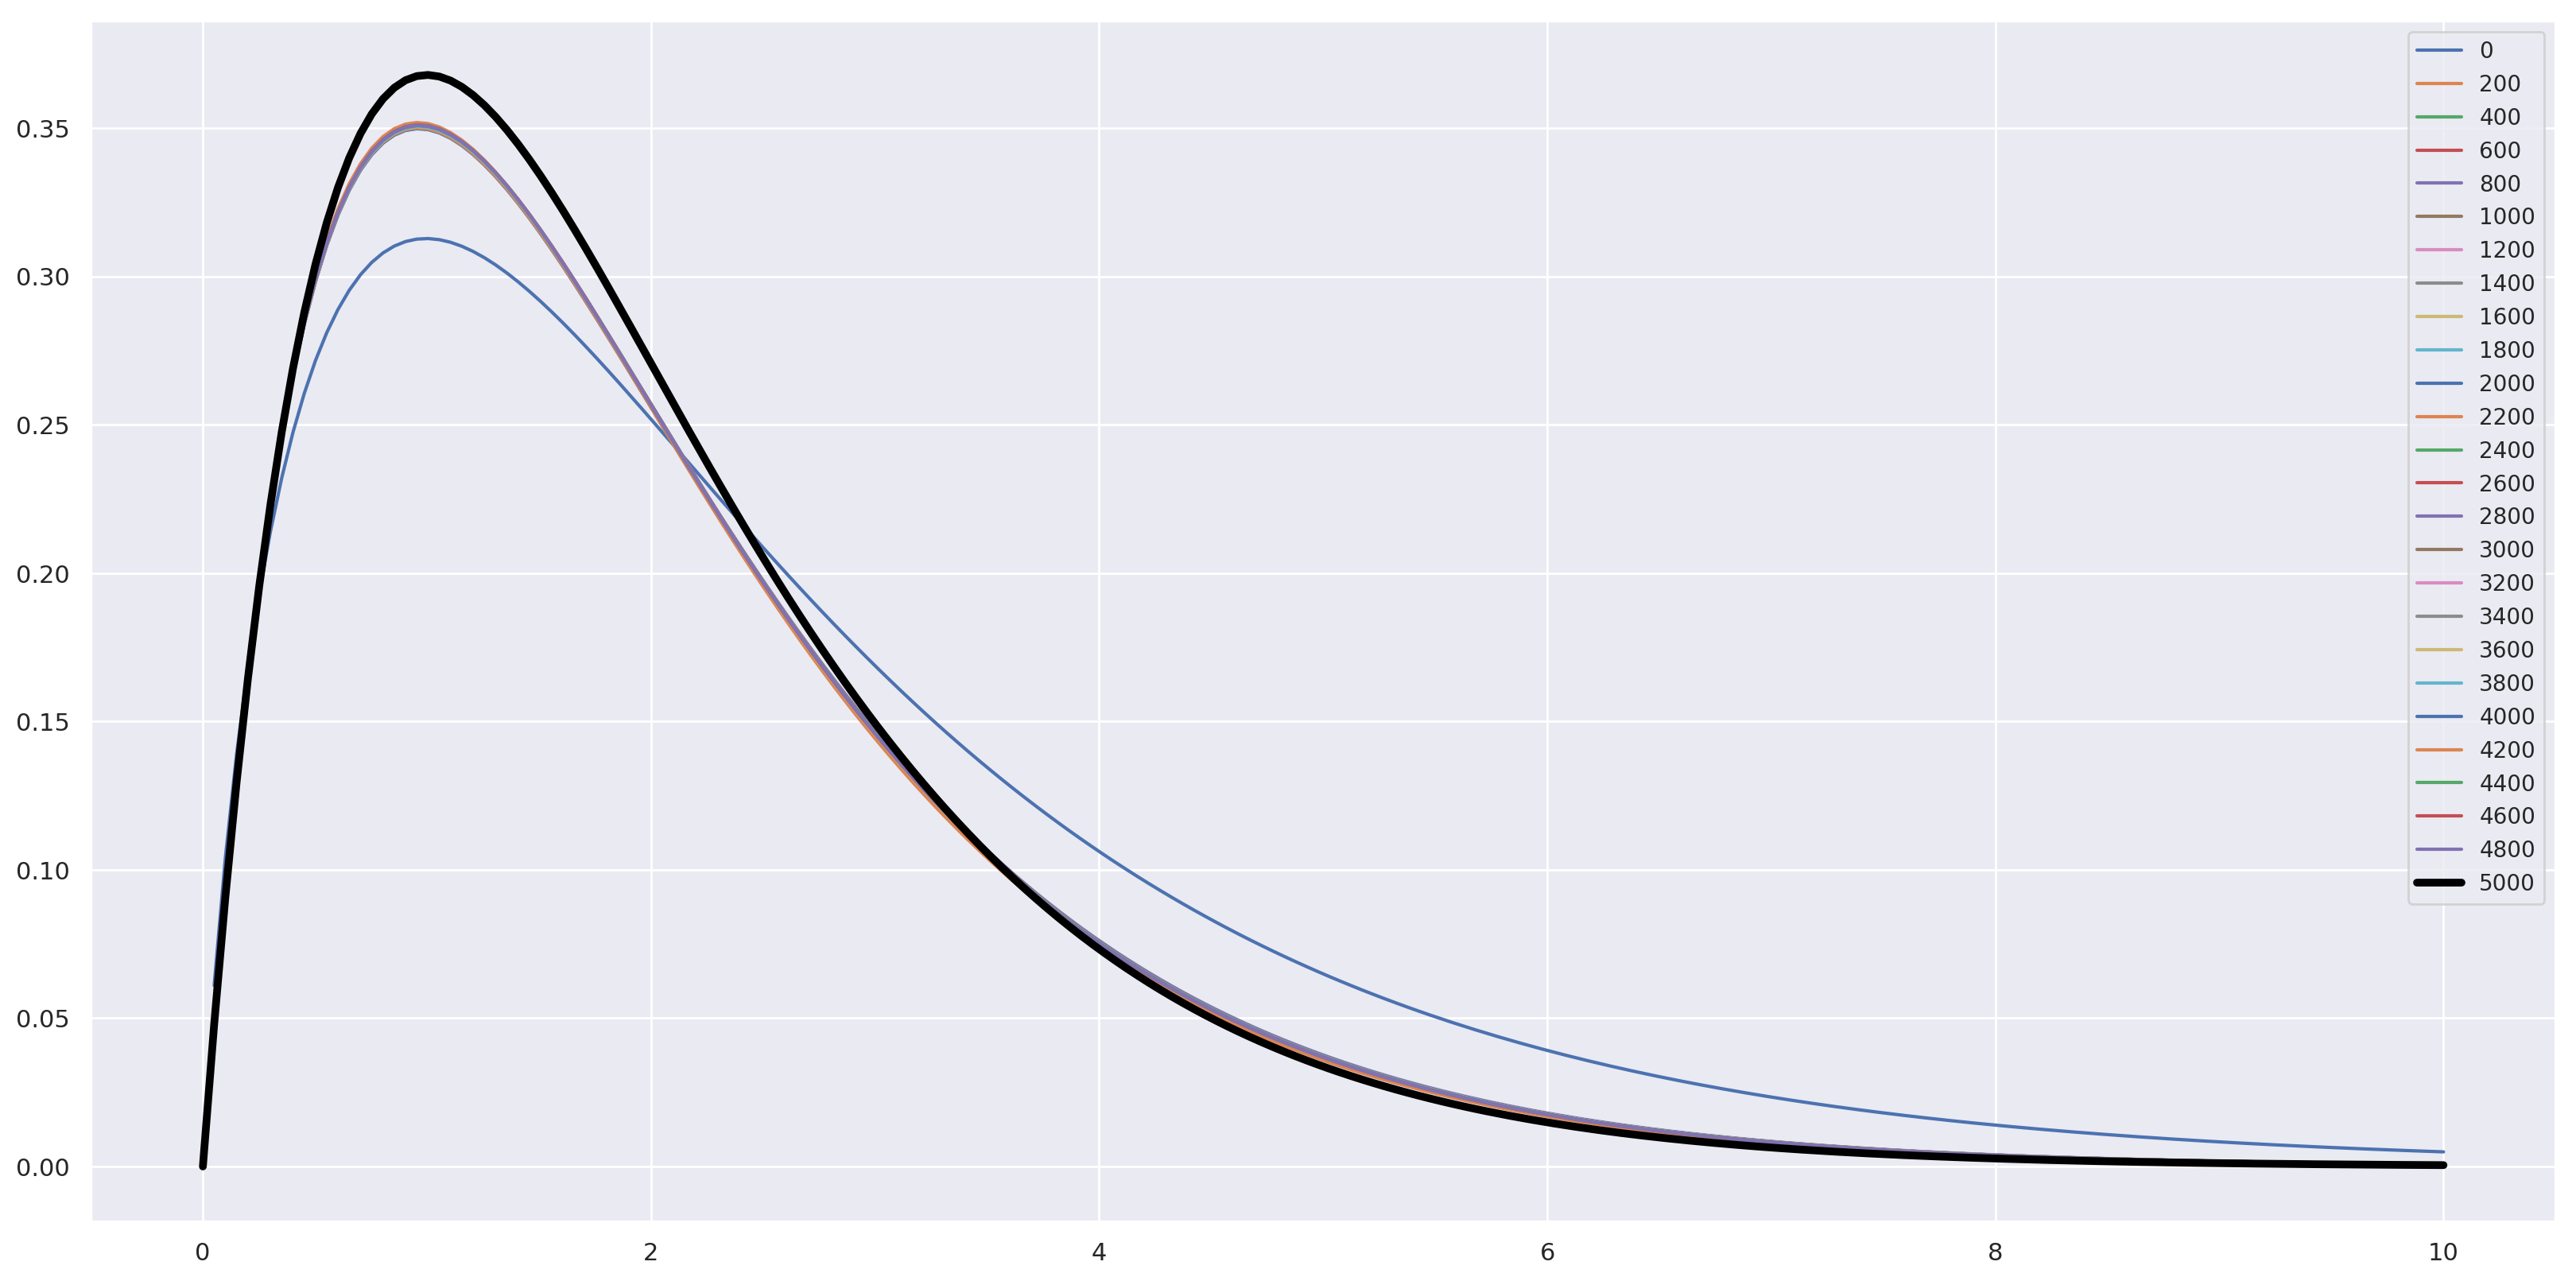

In [30]:
print(k, i1, i2)         ##NOT NORMALIZED YET
print(p,q)
val1=[]
val2=[]
val3=[]
mean_alp=0
mean_lam=0
mean_muu=0
p=-1
q=-1
plt.figure(figsize=(20,10), dpi=200)
pal = sns.dark_palette("palegreen", as_cmap=True)
#sns.set(style="whitegrid")
l=5000
for i in range(l):
    val3.append(np.random.uniform(0, np.amin(R)))                                  
    k=integrate.quad(lambda alpha: K(alpha, val3[i]), 0, 6)[0]
    i1=integrate.quad(lambda alpha: I1(alpha, val3[i]), 0, 6)[0]
    i2=integrate.quad(lambda alpha: I2(alpha, val3[i]), 0, 6)[0]
    p=(i1*i1)/((k*i2)-(i1*i1))
    q=(p*k)/i1
    val1.append(np.random.gamma(p,1/q))
    val2.append(np.random.gamma(A+N, 1/(B+np.sum(np.power(R-val3[i],val1[i])))))
    mean_alp=(mean_alp*i + val1[i])/(i+1)
    mean_lam=(mean_lam*i + val2[i])/(i+1)
    mean_muu=(mean_muu*i + val3[i])/(i+1)
    if i%200==0:
        Val1=np.array(val1)
        Val2=np.array(val2)
        x1 = np.linspace (0, 10, 200) 
        y1 = mean_alp*mean_lam*np.power(x1-mean_muu,mean_alp)*np.exp(-mean_lam*np.power(x1-mean_muu,mean_alp))
        #y1 = np.mean(Val1)*np.mean(Val2)*np.power(x1,np.mean(Val1))*np.exp(-np.mean(Val2)*np.power(x1,np.mean(Val1)))
        #plt.figure()
        #sns.scatterplot(x1,y1, label=i, linewidth=2.5, cmap=pal)
        plt.plot(x1,y1, label=i)
        
val1=np.array(val1)
val2=np.array(val2)
val3=np.array(val3)
y1 = ALPHA*LAMBDA*np.power(x1-MU,ALPHA)*np.exp(-LAMBDA*np.power(x1-MU,ALPHA))
plt.plot(x1,y1,label=l, color="black",linewidth=3.5)
plt.legend(prop={'size': 10})

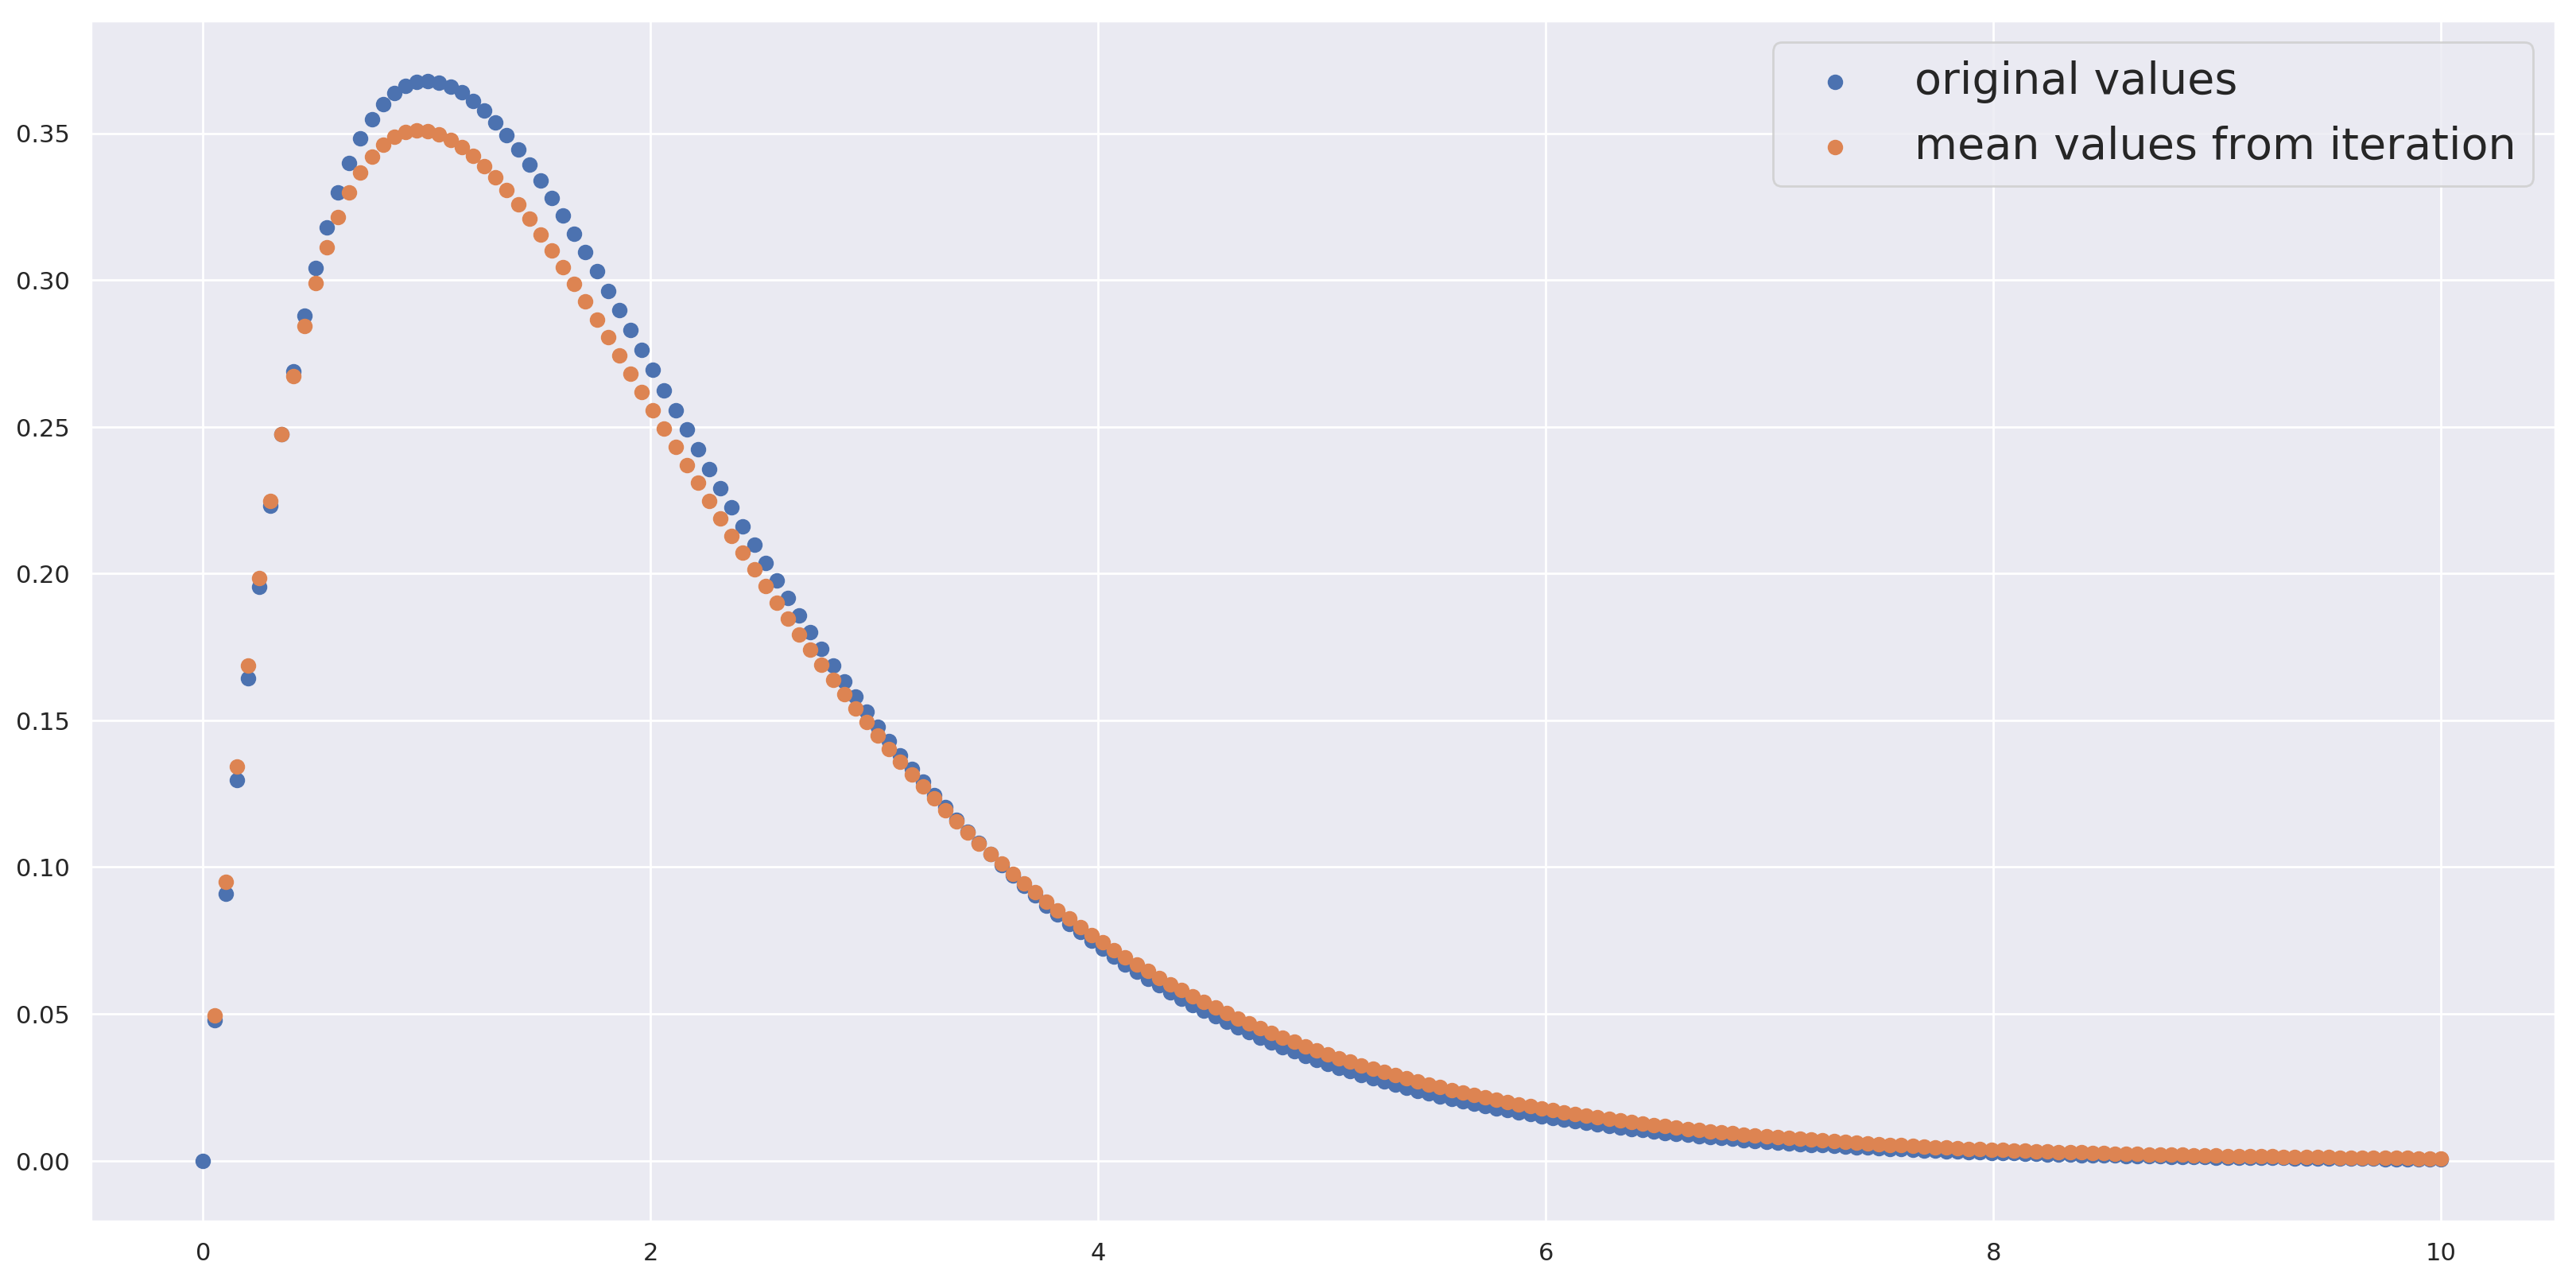

In [31]:
plt.figure(figsize=(20,10), dpi=200)
x1 = np.linspace (0, 10, 200) 
y1 = ALPHA*LAMBDA*np.power(x1-MU,ALPHA)*np.exp(-LAMBDA*np.power(x1-MU,ALPHA))
plt.scatter(x1,y1, label='original values')
# y2 = val1[-1]*val2[-1]*np.power(x1,val1[-1])*np.exp(-val2[-1]*np.power(x1,val1[-1]))
# plt.scatter(x1,y2, label='final values from iteration')
y3 = np.mean(val1)*np.mean(val2)*np.power(x1-np.mean(val3),np.mean(val1))*np.exp(-np.mean(val2)*np.power(x1-np.mean(val3),np.mean(val1)))
plt.scatter(x1,y3, label='mean values from iteration')
plt.legend(prop={'size': 20})

In [32]:
print('alpha for N = {}, priors - lambda~Gamma({}, {}), alpha~Gamma({}, {})'.format(N,A,B,C,D))
print('mean is {}'.format(np.mean(val1)))
print('MSE is {}'.format((1/l)*np.sum(np.square(val1-ALPHA))))

alpha for N = 40, priors - lambda~Gamma(50, 50), alpha~Gamma(50, 50)
mean is 0.9540325158285131
MSE is 0.01032251963656022


In [33]:
print('lambda for N = {}, priors - lambda~Gamma({}, {}), alpha~Gamma({}, {})'.format(N,A,B,C,D))
print('mean is {}'.format(np.mean(val2)))
print('MSE is {}'.format((1/l)*np.sum(np.square(val2-LAMBDA))))

lambda for N = 40, priors - lambda~Gamma(50, 50), alpha~Gamma(50, 50)
mean is 1.0401582260128415
MSE is 0.014223507298679772


In [34]:
print('mean is {}'.format(np.mean(val3)))
print('MSE is {}'.format((1/l)*np.sum(np.square(val3-MU))))

mean is 0.004543108911511169
MSE is 2.735853204469734e-05


In [35]:
va=np.sort(val1)
vl=np.sort(val2)
vu=np.sort(val3)
percentage=95
beta=(1-percentage/100)/2
(la,ua)=va[int(beta*l)], va[int((1-beta)*l)]
(ll,ul)=vl[int(beta*l)], vl[int((1-beta)*l)]
(lu,uu)=vu[int(beta*l)], vu[int((1-beta)*l)]
print(la, ua, ll, ul, lu, uu, beta)

0.7855313493613374 1.1372832844536775 0.8361880171111424 1.2746650622758438 0.0002182443727372267 0.00879356080178385 0.025000000000000022
